    13-1: In NSFG cycles 6 and 7, the variable cmdivorcx contians the date of divorce for the respondent's first marriage, if applicable, encoded in century months. Compute the duraction of marrriages that have ended in divorce, and the duration, so far, of marriages that are ongoing. Estimate the hazard and survival function for the duration of marriage. Use resampling to take into account sampling weights, and plot data from several resamples to visualize sampling error. Consider dividing the respondents into groups by decade of birth, and possibly by age at first marriage. 

In [9]:
import nsfg
import thinkstats2
import thinkplot
import numpy as np
import pandas as pd
import survival

In [10]:
resp = chap01soln.ReadFemResp()
sf = SurvivalFunction(csf)

def EstimateSurvivalByDecade(resp):
    for name, group in groups:
        hs, sf = EstimateSurvival(group)
        thinkplot.Plot(sf)
        

        
def EstimateMarriageSurvivalByDecade(groups, **options):
    thinkplot.PrePlot(len(groups))
    for _, group in groups:
        _, sf = EstimateMarriageSurvival(group)
        thinkplot.Plot(sf, **options)
        
def EstimateMarriageSurvival(resp):
    complete = resp[resp.evrmarry == 1].agemarry.dropna()
    ongoing = resp[resp.evrmarry == 0].age

    hf = EstimateHazardFunction(complete, ongoing)
    sf = hf.MakeSurvival()

    return hf, sf


def PlotResampledByDecade(resps, iters=11, predict_flag=False, omit=None):
    for i in range(iters):
        samples = [thinkstats2.ResampleRowsWeighted(resp) 
                   for resp in resps]
        sample = pd.concat(samples, ignore_index=True)
        groups = sample.groupby('decade')

        if omit:
            groups = [(name, group) for name, group in groups 
                      if name not in omit]
        if i == 0:
            AddLabelsByDecade(groups, alpha=0.7)

        if predict_flag:
            PlotPredictionsByDecade(groups, alpha=0.1)
            EstimateMarriageSurvivalByDecade(groups, alpha=0.1)
        else:
            EstimateMarriageSurvivalByDecade(groups, alpha=0.2)

def CleanFemResp(resp):
    resp.cmmarrhx.replace([9997, 9998, 9999], np.nan, inplace=True)

    resp['agemarry'] = (resp.cmmarrhx - resp.cmbirth) / 12.0
    resp['age'] = (resp.cmintvw - resp.cmbirth) / 12.0

    month0 = pd.to_datetime('1899-12-15')
    dates = [month0 + pd.DateOffset(months=cm) 
             for cm in resp.cmbirth]
    resp['year'] = (pd.DatetimeIndex(dates).year - 1900)
    resp['decade'] = resp.year // 10
    resp['fives'] = resp.year // 5

SyntaxError: invalid syntax (2385817055.py, line 27)

In [4]:
resp = nsfg.ReadFemResp()
resp.cmmarrhx.replace([9997, 9998, 9999], np.nan, inplace=True)
resp["agemarry"] = (resp.cmmarrhx - resp.cmbirth) / 12.0
resp["age"] = (resp.cmintvw - resp.cmbirth) / 12.0
complete = resp[resp.evrmarry == 1].agemarry.dropna()
ongoing = resp[resp.evrmarry == 0].age

#cmdiorcx

In [11]:
resp6 = survival.ReadFemResp2002()
resp7 = survival.ReadFemResp2010()

C:\Users\brean\OneDrive\Desktop\NucampFolder\projects\ThinkStats2\code\survival.py:300: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
C:\Users\brean\OneDrive\Desktop\NucampFolder\projects\ThinkStats2\code\survival.py:300: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
C:\Users\brean\OneDrive\Desktop\NucampFolder\projects\ThinkStats2\code\survival.py:300: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
C:\Users\brean\OneDrive\Desktop\NucampFolder\projects\ThinkStats2\code\survival.py:300: FutureWarning: The default dtype for empty Series will be 'object' instead of 

C:\Users\brean\OneDrive\Desktop\NucampFolder\projects\ThinkStats2\code\survival.py:300: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
C:\Users\brean\OneDrive\Desktop\NucampFolder\projects\ThinkStats2\code\survival.py:300: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
C:\Users\brean\OneDrive\Desktop\NucampFolder\projects\ThinkStats2\code\survival.py:300: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
C:\Users\brean\OneDrive\Desktop\NucampFolder\projects\ThinkStats2\code\survival.py:300: FutureWarning: The default dtype for empty Series will be 'object' instead of 

C:\Users\brean\OneDrive\Desktop\NucampFolder\projects\ThinkStats2\code\survival.py:300: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
C:\Users\brean\OneDrive\Desktop\NucampFolder\projects\ThinkStats2\code\survival.py:300: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
C:\Users\brean\OneDrive\Desktop\NucampFolder\projects\ThinkStats2\code\survival.py:300: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
C:\Users\brean\OneDrive\Desktop\NucampFolder\projects\ThinkStats2\code\survival.py:300: FutureWarning: The default dtype for empty Series will be 'object' instead of 

C:\Users\brean\OneDrive\Desktop\NucampFolder\projects\ThinkStats2\code\survival.py:300: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
C:\Users\brean\OneDrive\Desktop\NucampFolder\projects\ThinkStats2\code\survival.py:300: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
C:\Users\brean\OneDrive\Desktop\NucampFolder\projects\ThinkStats2\code\survival.py:300: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
C:\Users\brean\OneDrive\Desktop\NucampFolder\projects\ThinkStats2\code\survival.py:300: FutureWarning: The default dtype for empty Series will be 'object' instead of 

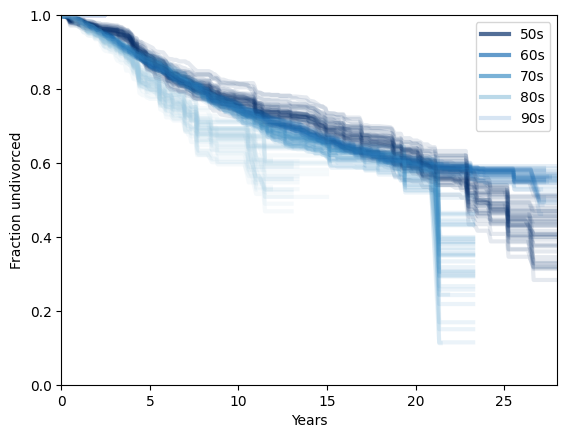

In [12]:
def CleanData(resp):
    
    resp.cmdivorcx.replace([9998, 9999], np.nan, inplace=True)

    resp["notdivorced"] = resp.cmdivorcx.isnull().astype(int)
    resp["duration"] = (resp.cmdivorcx - resp.cmmarrhx) / 12.0
    resp["durationsofar"] = (resp.cmintvw - resp.cmmarrhx) / 12.0

    month0 = pd.to_datetime("1899-12-15")
    dates = [month0 + pd.DateOffset(months=cm) for cm in resp.cmbirth]
    resp["decade"] = (pd.DatetimeIndex(dates).year - 1900) // 10

    
CleanData(resp6)
married6 = resp6[resp6.evrmarry == 1]

CleanData(resp7)
married7 = resp7[resp7.evrmarry == 1]


def ResampleDivorceCurve(resps):

    for _ in range(11):
        samples = [thinkstats2.ResampleRowsWeighted(resp) for resp in resps]
        sample = pd.concat(samples, ignore_index=True)
        PlotDivorceCurveByDecade(sample, color="#225EA8", alpha=0.1)

    thinkplot.Show(xlabel="years", axis=[0, 28, 0, 1])
    
def ResampleDivorceCurveByDecade(resps):

    for i in range(41):
        samples = [thinkstats2.ResampleRowsWeighted(resp) for resp in resps]
        sample = pd.concat(samples, ignore_index=True)
        groups = sample.groupby("decade")
        if i == 0:
            survival.AddLabelsByDecade(groups, alpha=0.7)

        EstimateSurvivalByDecade(groups, alpha=0.1)

    thinkplot.Config(xlabel="Years", ylabel="Fraction undivorced", axis=[0, 28, 0, 1])
    
def EstimateSurvivalByDecade(groups, **options):

    thinkplot.PrePlot(len(groups))
    for name, group in groups:
        _, sf = EstimateSurvival(group)
        thinkplot.Plot(sf, **options)
        
 
        
def EstimateSurvival(resp):

    complete = resp[resp.notdivorced == 0].duration.dropna()
    ongoing = resp[resp.notdivorced == 1].durationsofar.dropna()

    hf = survival.EstimateHazardFunction(complete, ongoing)
    sf = hf.MakeSurvival()

    return hf, sf

ResampleDivorceCurveByDecade([married6, married7])